In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import numpy as np 
import scipy.fft
from operators.legendre.setup_legendre import SimulationSetupLegendre
from operators.poisson_solver import gmres_solver
from operators.legendre.legendre_operators import xi_legendre, charge_density_legendre, total_mass_legendre, total_momentum_legendre, total_energy_k_legendre

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# Enable LaTeX rendering
matplotlib.rcParams['text.usetex'] = True

In [9]:
def kappa(v, k):
    return np.power(1 + (v**2)/k, -k-1) * scipy.special.gamma(k) / scipy.special.gamma(k-0.5) / np.sqrt(k)

In [17]:
x = np.linspace(-10, 10, 10000)
maxwellian_vec = np.exp(-x**2)

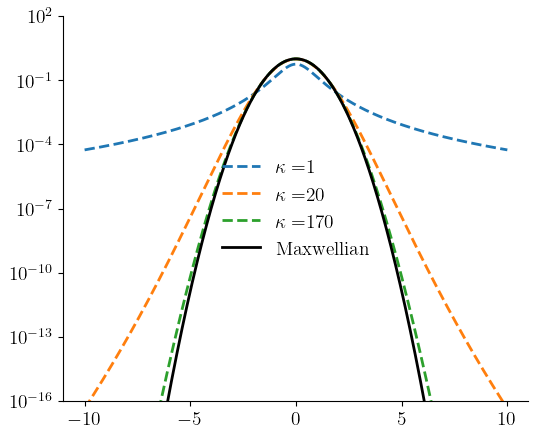

In [36]:
fig, ax = plt.subplots(figsize=(6, 5))
for ii in [1,  20, 170]:
    kappa_vec = kappa(v=x, k=ii)
    ax.plot(x, kappa_vec, label="$\kappa =$" + str(ii), ls="--", linewidth=2)
ax.plot(x, maxwellian_vec, label="Maxwellian", color="black", linewidth=2)

ax.set_ylim(1e-16, 1e2)
plt.yscale("log")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

legend = ax.legend(ncols=1, fontsize=14, loc='center')
text = ax.text(-0.2,1.05, " ", transform=ax.transAxes)
legend.get_frame().set_alpha(0)

$f(x, v, t) = \cos(x-t) \left[1 + \frac{v^2}{\kappa(t)}\right]^{-\kappa(t) -1} \frac{\Gamma(\kappa(t))}{\Gamma(\kappa(t) - 0.5)\sqrt{\kappa(t)}} $ with $\kappa(t) = 170 - t$